This jupyter Notebook consists the first project assigned by Associate Professor Panos Louridas for the course Applied Machine Learning at the 7th Semester in the Department of Management Science and Technology (DMST) of the Athens University of Economics and Business (AUEB).



>Author: Ferdinandos Tzimas<br />
>MSc Student in Business Analytics at Athens University of Economics and Business<br />
>BSc Department of Science and Technology at Athens University of Economics and Business<br />
>Github: https://github.com/ferdinandostzimas<br />
>LinkedIn: https://www.linkedin.com/in/ferdinandos-tzimas-903829182/

# Exploring US Flights Data

In this assignment, you will investigate the [Airline On-Time Performance Data](https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time#) that we have already met in one of our lectures.

You will use the 2018 data available at <https://auebgr-my.sharepoint.com/:u:/g/personal/louridas_aueb_gr/EbeTzde1LddFmqNWBFWWxNcBj5tDR_zvzDHvqqcmnndeEQ?e=0pwH6j>.

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

# Data
The data that we will be using are the Airline On-Time Performance Data and we will use the 2018 data that can be found within the files of this repository.

The following answers assume that the data will reside in the same directory as this notebook.

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading the Data
We begin by reading the data from the csv.
You may notice that there are several Nan values in some columns of the data. However, the column where these Nan values reside will not affect the outcome on this project so no relevant actions are necessary.
We notice in the following Questions that departure delay is one of the one the most important columns in our analysis. However, the dataset contains negative values for this column when a plane departs early, which will skew our analysis. For that reasons i will set all early departures to zero.



In [2]:
df=pd.read_csv('671009038_T_ONTIME_REPORTING.csv',parse_dates=['FL_DATE'])
df.loc[df['DEP_DELAY']<0,'DEP_DELAY']=0
df.head(100)

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
0,2019-01-01,N8974C,9E,AVL,"Asheville, NC",ATL,"Atlanta, GA",1658.0,0.0,1758.0,-22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,N922XJ,9E,JFK,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,0.0,1255.0,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,N326PQ,9E,CLE,"Cleveland, OH",DTW,"Detroit, MI",1334.0,0.0,1417.0,-31.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,N135EV,9E,BHM,"Birmingham, AL",ATL,"Atlanta, GA",1059.0,0.0,1255.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,N914XJ,9E,GTF,"Great Falls, MT",MSP,"Minneapolis, MN",1057.0,0.0,1418.0,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01,N926XJ,9E,IAD,"Washington, DC",JFK,"New York, NY",550.0,0.0,702.0,-20.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
96,2019-01-01,N316PQ,9E,ATL,"Atlanta, GA",TYS,"Knoxville, TN",953.0,0.0,1044.0,-20.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
97,2019-01-01,N316PQ,9E,TYS,"Knoxville, TN",ATL,"Atlanta, GA",1135.0,0.0,1233.0,-15.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
98,2019-01-01,218NV,G4,FWA,"Fort Wayne, IN",SFB,"Sanford, FL",1920.0,31.0,2132.0,27.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,27.0,NaN


Due to the rows in the csv file ending in commas, an unwanted column is created by the name "Unnamed:19"

In [3]:
del df['Unnamed: 19']
df.head(100)

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2019-01-01,N8974C,9E,AVL,"Asheville, NC",ATL,"Atlanta, GA",1658.0,0.0,1758.0,-22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,N922XJ,9E,JFK,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,0.0,1255.0,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,N326PQ,9E,CLE,"Cleveland, OH",DTW,"Detroit, MI",1334.0,0.0,1417.0,-31.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,N135EV,9E,BHM,"Birmingham, AL",ATL,"Atlanta, GA",1059.0,0.0,1255.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,N914XJ,9E,GTF,"Great Falls, MT",MSP,"Minneapolis, MN",1057.0,0.0,1418.0,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01,N926XJ,9E,IAD,"Washington, DC",JFK,"New York, NY",550.0,0.0,702.0,-20.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
96,2019-01-01,N316PQ,9E,ATL,"Atlanta, GA",TYS,"Knoxville, TN",953.0,0.0,1044.0,-20.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
97,2019-01-01,N316PQ,9E,TYS,"Knoxville, TN",ATL,"Atlanta, GA",1135.0,0.0,1233.0,-15.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
98,2019-01-01,218NV,G4,FWA,"Fort Wayne, IN",SFB,"Sanford, FL",1920.0,31.0,2132.0,27.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,27.0


## Question 1

Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight departing from that airport has a delay. Take care of outliers: some airports may have a preposterously low number of flights. We are not interested in them. Your criterion for outliers will be the airports in the lowest 1% percentile in the number of flights.

After you have done that, go around your data again, but this time you will show the average and median delay for each airport. You may sort the results by either.

Finally, enrich your airport misery index by tabulating both the probability, in descending order, that you will experience a delay at a given airport, and the average and median delay that you are likely to experience. 

# Answer to Question 1
Since Question 1 requests aggregates per airport i will use the airport as an index to this dataframe(df1)

In [4]:
df1=df.set_index('ORIGIN')
df1

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,,,,,,,,,,,,,,
AVL,2019-01-01,N8974C,9E,"Asheville, NC",ATL,"Atlanta, GA",1658.0,0.0,1758.0,-22.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
JFK,2019-01-01,N922XJ,9E,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,0.0,1255.0,-29.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
CLE,2019-01-01,N326PQ,9E,"Cleveland, OH",DTW,"Detroit, MI",1334.0,0.0,1417.0,-31.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
BHM,2019-01-01,N135EV,9E,"Birmingham, AL",ATL,"Atlanta, GA",1059.0,0.0,1255.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
GTF,2019-01-01,N914XJ,9E,"Great Falls, MT",MSP,"Minneapolis, MN",1057.0,0.0,1418.0,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORD,2019-12-31,N759EV,OO,"Chicago, IL",ROC,"Rochester, NY",1138.0,1004.0,1416.0,985.0,0.0,NaN,0.0,985.0,0.0,0.0,0.0,0.0
ORD,2019-12-31,N761ND,OO,"Chicago, IL",FWA,"Fort Wayne, IN",2139.0,189.0,2331.0,165.0,0.0,NaN,0.0,148.0,0.0,0.0,0.0,17.0
DAL,2019-12-31,N192SY,OO,"Dallas, TX",PDX,"Portland, OR",754.0,0.0,1013.0,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Removing the outliers based on the number of flights

In [5]:
df99=df1.loc[df1.groupby("ORIGIN").size()>df1.groupby("ORIGIN").size().quantile(0.01)]
df99.shape

(7421732, 18)

Retrieving the total number of flights per airport and the number of delayed flights per airport to calculate the propability of delay per airport

In [6]:
size=df99.groupby('ORIGIN').size()
size.head(100)



ORIGIN
ABE      5014
ABI      2272
ABQ     23731
ABR       750
ABY      1005
        ...  
DLH      3376
DRO      3242
DRT       723
DSM     16951
DTW    161768
Length: 100, dtype: int64

In [7]:
delaysize=df99.loc[df99['DEP_DELAY']>0].groupby('ORIGIN').size()
delaysize.head(100)

ORIGIN
ABE     1397
ABI      679
ABQ     8420
ABR      185
ABY      272
       ...  
DLH      867
DRO      864
DRT      177
DSM     4277
DTW    46945
Length: 100, dtype: int64

Displaying Mean, Median and propability of delay per airport as requested above, sorted by Mean.

In [8]:
answer1=df99.groupby('ORIGIN').agg({"DEP_DELAY": [np.mean, np.median]})
answer1['prob']=delaysize/size
answer1=answer1.sort_values(by=('DEP_DELAY','mean'),ascending=False)
answer1.head(100)

DEP_DELAY             prob
             mean median          
ORIGIN                            
OTH     38.171745    0.0  0.402089
MMH     35.853659    0.0  0.336268
MEI     34.480423    0.0  0.366154
XWA     34.424390    0.0  0.449275
HYA     33.542169    3.0  0.554217
...           ...    ...       ...
RST     17.598487    0.0  0.288645
SJU     17.556525    0.0  0.365253
SBN     17.485573    0.0  0.334479
BOS     17.450902    0.0  0.350031
ORD     17.428871    0.0  0.355303

[100 rows x 3 columns]

## Question 2

Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.


Then, go around your data again, but this time the criterion will be the average and median delay you may expect to have with an airline. Again we do not care about outliers.

And finally, as you would expect,  enrich your airline misery index by tabulating both the probability, in descending order, that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.


# Answer to Question 2
Since Question 2 does not require any actions for the outliers i will be using the original dataset

Finding the total number of flights per airline and the total number of delayed flights per airline in order to find the requested propability

In [9]:
size2=df.groupby('CARRIER').size()
size2.head(100)

CARRIER
9E     257132
AA     946776
AS     264816
B6     297411
DL     991986
EV     134683
F9     135543
G4     105305
HA      83891
MQ     327007
NK     204845
OH     289304
OO     836445
UA     625910
WN    1363946
YV     227888
YX     329149
dtype: int64

In [10]:
delaysize2=df.loc[df.DEP_DELAY>0.0].groupby('CARRIER').size()
delaysize2.head(100)

CARRIER
9E     64608
AA    351196
AS     83448
B6    115013
DL    303148
EV     39238
F9     52657
G4     33362
HA     24719
MQ     94240
NK     65082
OH     92685
OO    229729
UA    205168
WN    621819
YV     65698
YX     79682
dtype: int64

Displaying Mean, Median and propability of delay per airline as requested above, sorted by Mean.

In [11]:
answer2=df.groupby('CARRIER').agg({"DEP_DELAY": [np.mean, np.median]})
answer2['prob']=delaysize2/size2
print(answer2.head(100))
answer2=answer2.sort_values(by=('DEP_DELAY','mean'),ascending=False)
answer2.head(100)

         DEP_DELAY             prob
              mean median          
CARRIER                            
9E       14.348647    0.0  0.251264
AA       14.895515    0.0  0.370939
AS        9.834693    0.0  0.315117
B6       21.854736    0.0  0.386714
DL       10.856695    0.0  0.305597
EV       21.644793    0.0  0.291336
F9       18.826018    0.0  0.388489
G4       14.678433    0.0  0.316813
HA        5.036265    0.0  0.294656
MQ       13.067124    0.0  0.288190
NK       14.221530    0.0  0.317713
OH       14.422963    0.0  0.320372
OO       16.388317    0.0  0.274649
UA       16.467488    0.0  0.327792
WN       11.793784    0.0  0.455897
YV       17.442639    0.0  0.288291
YX       12.782091    0.0  0.242085


DEP_DELAY             prob
              mean median          
CARRIER                            
B6       21.854736    0.0  0.386714
EV       21.644793    0.0  0.291336
F9       18.826018    0.0  0.388489
YV       17.442639    0.0  0.288291
UA       16.467488    0.0  0.327792
OO       16.388317    0.0  0.274649
AA       14.895515    0.0  0.370939
G4       14.678433    0.0  0.316813
OH       14.422963    0.0  0.320372
9E       14.348647    0.0  0.251264
NK       14.221530    0.0  0.317713
MQ       13.067124    0.0  0.288190
YX       12.782091    0.0  0.242085
WN       11.793784    0.0  0.455897
DL       10.856695    0.0  0.305597
AS        9.834693    0.0  0.315117
HA        5.036265    0.0  0.294656

## Question 3

Create a histogram that shows the distribution of departures for airports. That is, the x-axis will be bins containing flights and the y-axis will be the number of airports with departing flights in each particular bin.

# Answer to Question 3
First we will isolate the data needed for the visualization which is the number of flights grouped by airport of departure

In [12]:
flightnum=df.groupby('ORIGIN').size()
flightnum=flightnum.reset_index()
flightnum=flightnum.rename(columns={"ORIGIN": "ORIGIN", 0: "FLIGHTS"})
print(flightnum)
print(flightnum['FLIGHTS'].max())


    ORIGIN  FLIGHTS
0      ABE     5014
1      ABI     2272
2      ABQ    23731
3      ABR      750
4      ABY     1005
..     ...      ...
355    WYS      264
356    XNA    14134
357    XWA      207
358    YAK      722
359    YUM     1919

[360 rows x 2 columns]
395009


Based on the above dataframe i will create the bins for the histogram

In [13]:

bins0 = np.logspace(0, 6, num=7)
bins = np.insert(bins0, 0, 0)
counts = flightnum['FLIGHTS'].value_counts(bins=bins).sort_index()
counts

(-0.001, 1.0]              0
(1.0, 10.0]                0
(10.0, 100.0]              5
(100.0, 1000.0]           89
(1000.0, 10000.0]        166
(10000.0, 100000.0]       78
(100000.0, 1000000.0]     22
Name: FLIGHTS, dtype: int64

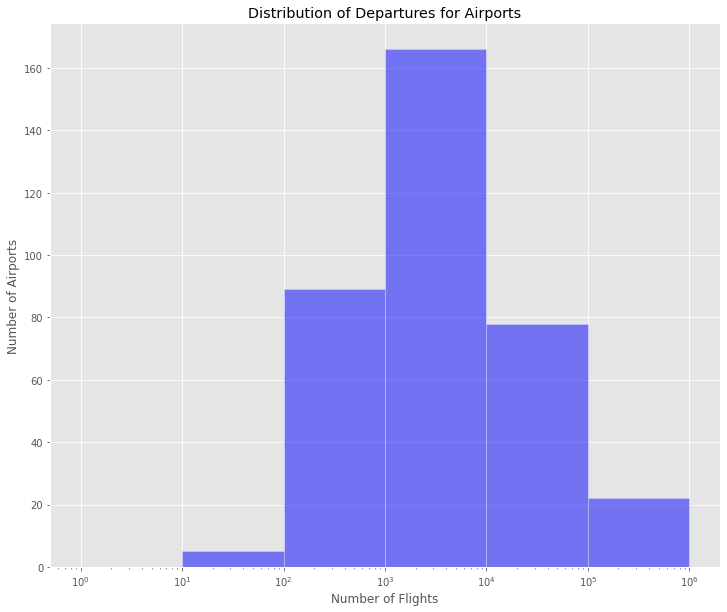

In [14]:
from matplotlib.ticker import ScalarFormatter
plt.style.use('ggplot')
flightnum.hist(bins=bins, color='blue',edgecolor='white', 
       alpha=0.5, figsize=(12, 10))
plt.gca().set_xscale("log")
plt.xlabel('Number of Flights')
plt.ylabel('Number of Airports')
plt.title('Distribution of Departures for Airports')

plt.xticks(bins0,)
plt.show()


## Question 4


We are interested in the temporal distribution of delays for January, so create a plot that shows the number of flights and the number of delayed flights per day for the first month.

# Answer to Question 4
I will create a new dataset containing only flights that departed in January. For that dataset i will create a column showing the day of the month.
After that, I will create a new categorical column that will indicate the flights that were delayed with 1 and those that didnt with 0

In [15]:

df['month']=df["FL_DATE"].dt.month
dfjan=df.loc[df['month']==1]
dfjan.tail(10)


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,month
583975,2019-01-31,N11547,EV,AEX,"Alexandria, LA",IAH,"Houston, TX",1609.0,1.0,1815.0,58.0,0.0,NaN,0.0,1.0,0.0,57.0,0.0,0.0,1
583976,2019-01-31,N12163,EV,EWR,"Newark, NJ",ORF,"Norfolk, VA",1522.0,2.0,1644.0,-6.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
583977,2019-01-31,N11536,EV,IAH,"Houston, TX",BRO,"Brownsville, TX",958.0,0.0,1122.0,-6.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
583978,2019-01-31,N10575,EV,LCH,"Lake Charles, LA",IAH,"Houston, TX",545.0,0.0,626.0,-19.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
583979,2019-01-31,N14188,EV,HOB,"Hobbs, NM",IAH,"Houston, TX",1305.0,0.0,1537.0,-13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
583980,2019-01-31,N19554,EV,PNS,"Pensacola, FL",ORD,"Chicago, IL",NaN,NaN,NaN,NaN,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN,1
583981,2019-01-31,N881AS,EV,IAD,"Washington, DC",ROC,"Rochester, NY",1234.0,0.0,1400.0,-10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
583982,2019-01-31,N881AS,EV,TYS,"Knoxville, TN",IAD,"Washington, DC",1002.0,0.0,1128.0,-11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
583983,2019-01-31,N16561,EV,CLE,"Cleveland, OH",LGA,"New York, NY",1629.0,0.0,1812.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
583984,2019-01-31,N16170,EV,PNS,"Pensacola, FL",IAH,"Houston, TX",1131.0,0.0,1337.0,2.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1


In [16]:
dfjan['delayed']=0
dfjan.loc[dfjan['DEP_DELAY']>0,'delayed']=1
dfjan.head(100)

<ipython-input-16-d11fb11d0885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfjan['delayed']=0
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,month,delayed
0,2019-01-01,N8974C,9E,AVL,"Asheville, NC",ATL,"Atlanta, GA",1658.0,0.0,1758.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
1,2019-01-01,N922XJ,9E,JFK,"New York, NY",RDU,"Raleigh/Durham, NC",1122.0,0.0,1255.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
2,2019-01-01,N326PQ,9E,CLE,"Cleveland, OH",DTW,"Detroit, MI",1334.0,0.0,1417.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
3,2019-01-01,N135EV,9E,BHM,"Birmingham, AL",ATL,"Atlanta, GA",1059.0,0.0,1255.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
4,2019-01-01,N914XJ,9E,GTF,"Great Falls, MT",MSP,"Minneapolis, MN",1057.0,0.0,1418.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01,N926XJ,9E,IAD,"Washington, DC",JFK,"New York, NY",550.0,0.0,702.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
96,2019-01-01,N316PQ,9E,ATL,"Atlanta, GA",TYS,"Knoxville, TN",953.0,0.0,1044.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
97,2019-01-01,N316PQ,9E,TYS,"Knoxville, TN",ATL,"Atlanta, GA",1135.0,0.0,1233.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0
98,2019-01-01,218NV,G4,FWA,"Fort Wayne, IN",SFB,"Sanford, FL",1920.0,31.0,2132.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,27.0,1,1


I will now group by day in order to create a new dataset for January that will only contain the day of January, the number of total and delayed flights for each day of that month,.

In [17]:
dfjan['day']=dfjan["FL_DATE"].dt.day
byday=dfjan.groupby('day').agg({"delayed": np.sum,"TAIL_NUM":np.size})
byday=byday.reset_index()
byday=byday.rename(columns={"delayed": "delayed", "TAIL_NUM": "total"})
byday

<ipython-input-17-15d891a02fc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfjan['day']=dfjan["FL_DATE"].dt.day


,day,delayed,total
0,1,7123,18009
1,2,9065,20384
2,3,7366,19522
3,4,5910,19566
4,5,5433,16807
5,6,7091,19448
6,7,5786,20015
7,8,4132,18815
8,9,3939,19236
9,10,5113,19980


I will now create the visual representation of the above table

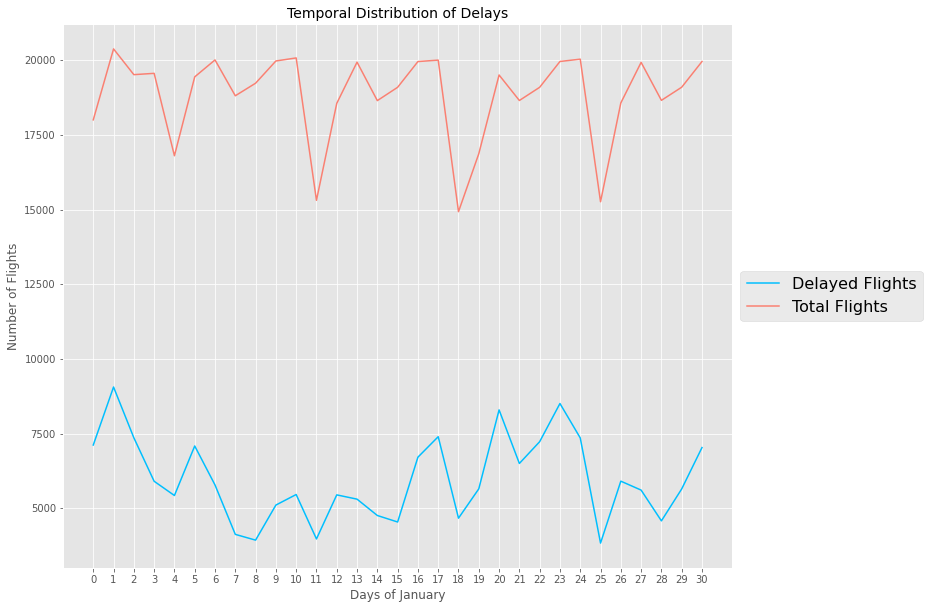

In [18]:
ax = plt.gca()
names = range(31)
byday.plot(kind='line',x='day',y='delayed',ax=ax, color='deepskyblue', figsize=(12, 10),
                label='Delayed Flights')
byday.plot(kind='line',x='day',y='total', color='salmon', ax=ax, label = 'Total Flights')
plt.xticks(byday.day, names)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.xlabel('Days of January')
plt.ylabel('Number of Flights')
plt.title('Temporal Distribution of Delays', fontsize = 14)
plt.show()

## Question 5

Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.

# Answer to Question 5
First i will create a new column containing combinations of airports of departure and arrival


In [41]:
df['comb']=df['ORIGIN_CITY_NAME']+"  -  "+df['DEST_CITY_NAME']
df['comb'].head(100)

0           Asheville, NC  -  Atlanta, GA
1     New York, NY  -  Raleigh/Durham, NC
2           Cleveland, OH  -  Detroit, MI
3          Birmingham, AL  -  Atlanta, GA
4     Great Falls, MT  -  Minneapolis, MN
                     ...                 
95        Washington, DC  -  New York, NY
96          Atlanta, GA  -  Knoxville, TN
97          Knoxville, TN  -  Atlanta, GA
98         Fort Wayne, IN  -  Sanford, FL
99       Cincinnati, OH  -  Las Vegas, NV
Name: comb, Length: 100, dtype: object

I will now isolate in the following dataset the combinations,airline and departure time.I am then grouping them by the combination and airline while calculating the mean delay for each group.

In [42]:
answer5=df[['comb','CARRIER','DEP_DELAY']]
answer5.head(100)


,comb,CARRIER,DEP_DELAY
0,"Asheville, NC - Atlanta, GA",9E,0.0
1,"New York, NY - Raleigh/Durham, NC",9E,0.0
2,"Cleveland, OH - Detroit, MI",9E,0.0
3,"Birmingham, AL - Atlanta, GA",9E,0.0
4,"Great Falls, MT - Minneapolis, MN",9E,0.0
...,...,...,...
95,"Washington, DC - New York, NY",9E,0.0
96,"Atlanta, GA - Knoxville, TN",9E,0.0
97,"Knoxville, TN - Atlanta, GA",9E,0.0
98,"Fort Wayne, IN - Sanford, FL",G4,31.0


In [43]:
answer5=answer5.groupby(['comb','CARRIER']).mean()

answer5=answer5.reset_index()
answer5

,comb,CARRIER,DEP_DELAY
0,"Aberdeen, SD - Minneapolis, MN",OO,20.452186
1,"Abilene, TX - Dallas/Fort Worth, TX",MQ,14.081021
2,"Adak Island, AK - Anchorage, AK",AS,20.561224
3,"Aguadilla, PR - Fort Lauderdale, FL",B6,14.759450
4,"Aguadilla, PR - Fort Lauderdale, FL",NK,10.430769
...,...,...,...
12988,"Yakutat, AK - Juneau, AK",AS,6.161932
12989,"Yuma, AZ - Dallas/Fort Worth, TX",OO,13.765101
12990,"Yuma, AZ - Dallas/Fort Worth, TX",YV,19.137931
12991,"Yuma, AZ - Phoenix, AZ",OO,8.156349


In order to find the airline with best mean delay time for a certain combination of origin and destination i will get the min value from all values from the table above matching that combination. For the combinationn of 'Aguadilla, PR  -  Fort Lauderdale, FL' that would be the following.

In [50]:
answer5[answer5['comb']=='Aguadilla, PR  -  Fort Lauderdale, FL'].min()


comb         Aguadilla, PR  -  Fort Lauderdale, FL
CARRIER                                         B6
DEP_DELAY                                10.430769
dtype: object